In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!python --version

Python 3.10.12


In [ ]:
!nvcc --version
import torch, torchvision,numpy
print(torch.__version__, torch.cuda.is_available(), numpy.__version__) #1.13.1 True 1.23.5

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
2.0.1+cu118 True 1.22.4


In [ ]:
!pip install -q ultralytics
!pip install -q -U layoutparser

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.4/605.4 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 81.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.6/87.6 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 108.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 97.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 59.9 MB/s eta 0:00:00


In [ ]:
import layoutparser as lp
import cv2
import yaml
import io
import os
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

In [ ]:
# for ocr
!wget https://paddle-wheel.bj.bcebos.com/2.3.0/linux/linux-gpu-cuda11.1-cudnn8.1-mkl-gcc8.2-avx/paddlepaddle_gpu-2.3.0.post111-cp38-cp38-linux_x86_64.whl
!pip install -q paddlepaddle_gpu-2.3.0.post111-cp38-cp38-linux_x86_64.whl
!pip uninstall -q protobuf
!pip install -q --no-binary protobuf protobuf #==3.18.0
!pip install -q opencv-python==4.6.0.66
!pip install -q shapely==1.8.2
!pip install -q pyclipper==1.3.0.post3
!pip install -q scikit-image==0.19.3
!pip install -q imgaug==0.4.0
!pip install -q lmdb==1.3.0
!pip install -q tqdm==4.64.0
!pip install -q attrdict==2.0.1


--2023-07-18 06:58:29--  https://paddle-wheel.bj.bcebos.com/2.3.0/linux/linux-gpu-cuda11.1-cudnn8.1-mkl-gcc8.2-avx/paddlepaddle_gpu-2.3.0.post111-cp38-cp38-linux_x86_64.whl
Resolving paddle-wheel.bj.bcebos.com (paddle-wheel.bj.bcebos.com)... 103.235.46.61, 2409:8c04:1001:1002:0:ff:b001:368a
Connecting to paddle-wheel.bj.bcebos.com (paddle-wheel.bj.bcebos.com)|103.235.46.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 569607989 (543M) [application/octet-stream]
Saving to: ‘paddlepaddle_gpu-2.3.0.post111-cp38-cp38-linux_x86_64.whl’

paddlepaddle_gpu-2. 100%[===================>] 543.22M  13.7MB/s    in 54s     

2023-07-18 06:59:24 (10.1 MB/s) - ‘paddlepaddle_gpu-2.3.0.post111-cp38-cp38-linux_x86_64.whl’ saved [569607989/569607989]

ERROR: paddlepaddle_gpu-2.3.0.post111-cp38-cp38-linux_x86_64.whl is not a supported wheel on this platform.
Proceed (Y/n)? Y
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.2/400.2 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (se

In [ ]:
!sudo apt-get install -q gcc-7

!python -m pip install -q paddlepaddle-gpu==2.3.0.post111 -f https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html
# !pip install paddleocr==2.5.0.3

!pip install -q paddlepaddle -i https://pypi.tuna.tsinghua.edu.cn/simple

!pip install -q "paddleocr>=2.0.1" # Recommend to use version 2.0.1+
!pip install -q dist/paddleocr-2.0.1-py3-none-any.whl # x.x.x is the version of paddleocr

!pip install -q paddleocr

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  cpp-7 gcc-7-base gcc-8-base libasan4 libcilkrts5 libgcc-7-dev libmpx2
  libubsan0
Suggested packages:
  gcc-7-locales gcc-7-multilib gcc-7-doc
The following NEW packages will be installed:
  cpp-7 gcc-7 gcc-7-base gcc-8-base libasan4 libcilkrts5 libgcc-7-dev libmpx2
  libubsan0
0 upgraded, 9 newly installed, 0 to remove and 15 not upgraded.
Need to get 20.9 MB of archives.
After this operation, 68.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 gcc-7-base amd64 7.5.0-6ubuntu2 [18.5 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 cpp-7 amd64 7.5.0-6ubuntu2 [8,588 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 libasan4 amd64 7.5.0-6ubuntu2 [358 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal/universe amd64 libubsan0 amd64 7.5.0-6ubuntu2 [126 kB]
Get:5 http://archiv

In [ ]:
!pip paddleocr --version

ERROR: unknown command "paddleocr"


In [ ]:
from paddleocr import PaddleOCR
import numpy as np
import cv2
import json
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.auto import tqdm
from glob import glob
from pprint import pprint
import os
from google.colab.patches import cv2_imshow
tqdm.pandas()

In [ ]:
line=PaddleOCR(use_angle_cls=False, lang='en',use_gpu=True)
word=PaddleOCR(use_angle_cls=False, lang='ar',use_gpu=True)

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:15<00:00, 253kiB/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv3_rec_infer/en_PP-OCRv3_rec_infer.tar


100%|██████████| 9.96M/9.96M [00:16<00:00, 594kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:14<00:00, 151kiB/s]

[2023/07/18 07:04:26] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='/usr/local

download https://paddleocr.bj.bcebos.com/PP-OCRv3/multilingual/Multilingual_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer/Multilingual_PP-OCRv3_det_infer.tar


100%|██████████| 3.85M/3.85M [00:13<00:00, 277kiB/s]


download https://paddleocr.bj.bcebos.com/PP-OCRv3/multilingual/arabic_PP-OCRv3_rec_infer.tar to /root/.paddleocr/whl/rec/arabic/arabic_PP-OCRv3_rec_infer/arabic_PP-OCRv3_rec_infer.tar


100%|██████████| 10.3M/10.3M [00:17<00:00, 606kiB/s] 

[2023/07/18 07:05:00] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/arabic/arabic_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dic

In [ ]:
!pip install -q bnunicodenormalizer
!pip install -q onnxruntime-gpu

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 11.6 MB/s eta 0:00:00


In [ ]:
from __future__ import print_function
#-------------------------
# imports
#-------------------------
import onnxruntime as ort
import numpy as np
import cv2
from bnunicodenormalizer import Normalizer
NORM=Normalizer()

In [ ]:
class BanglaOCR(object):
    def __init__(self,
                model_weights,
                providers=['CUDAExecutionProvider'],
                img_height=32,
                img_width=256,
                pos_max=40):
        self.img_height=img_height
        self.img_width =img_width
        self.pos_max   =pos_max
        self.model     =ort.InferenceSession(model_weights, providers=providers)
        self.vocab     =["blank","!","\"","#","$","%","&","'","(",")","*","+",",","-",".","/",":",";","<","=",">","?","।",
                        "ঁ","ং","ঃ","অ","আ","ই","ঈ","উ","ঊ","ঋ","এ","ঐ","ও","ঔ",
                        "ক","খ","গ","ঘ","ঙ","চ","ছ","জ","ঝ","ঞ","ট","ঠ","ড","ঢ","ণ","ত","থ","দ","ধ","ন",
                        "প","ফ","ব","ভ","ম","য","র","ল","শ","ষ","স","হ",
                        "া","ি","ী","ু","ূ","ৃ","ে","ৈ","ো","ৌ","্",
                        "ৎ","ড়","ঢ়","য়","০","১","২","৩","৪","৫","৬","৭","৮","৯","‍","sep","pad"]

    def process_batch(self,crops):
        batch_img=[]
        batch_pos=[]
        for img in crops:
            # correct padding
            img,_=correctPadding(img,(self.img_height,self.img_width))
            # normalize
            img=img/255.0
            # extend batch
            img=np.expand_dims(img,axis=0)
            batch_img.append(img)
            # pos
            pos=np.array([[i for i in range(self.pos_max)]])
            batch_pos.append(pos)
        # stack
        img=np.vstack(batch_img)
        img=img.astype(np.float32)
        pos=np.vstack(batch_pos)
        pos=pos.astype(np.float32)
        # batch inp
        return {"image":img,"pos":pos}

    def __call__(self,crops,batch_size=32):
        # adjust batch_size
        if len(crops)<batch_size:
            batch_size=len(crops)
        texts=[]
        for idx in range(0,len(crops),batch_size):
            batch=crops[idx:idx+batch_size]
            inp=self.process_batch(batch)
            preds=self.model.run(None,inp)[0]
            preds =np.argmax(preds,axis=-1)
            # decoding
            for pred in preds:
                label=""
                for c in pred[1:]:
                    if c!=self.vocab.index("sep"):
                        label+=self.vocab[c]
                    else:
                        break
                texts.append(label)
        texts=[NORM(text)["normalized"] for text in texts]
        texts=[text for text in texts if text is not None]
        return texts

In [ ]:
from __future__ import print_function
# ---------------------------------------------------------
# imports
# ---------------------------------------------------------
import cv2
import numpy as np
import copy

In [ ]:
def padWordImage(img,pad_loc,pad_dim,pad_val):
    '''
        pads an image with white value
        args:
            img     :       the image to pad
            pad_loc :       (lr/tb) lr: left-right pad , tb=top_bottom pad
            pad_dim :       the dimension to pad upto
            pad_val :       the value to pad
    '''

    if pad_loc=="lr":
        # shape
        h,w,d=img.shape
        # pad widths
        pad_width =pad_dim-w
        # pads
        pad =np.ones((h,pad_width,3))*pad_val
        # pad
        img =np.concatenate([img,pad],axis=1)
    else:
        # shape
        h,w,d=img.shape
        # pad heights
        if h>= pad_dim:
            return img
        else:
            pad_height =pad_dim-h
            # pads
            pad =np.ones((pad_height,w,3))*pad_val
            # pad
            img =np.concatenate([img,pad],axis=0)
    return img.astype("uint8")

In [ ]:
def correctPadding(img,dim,pvalue=255):
    '''
        corrects an image padding
        args:
            img     :       numpy array of single channel image
            dim     :       tuple of desired img_height,img_width
            pvalue  :       the value to pad
        returns:
            correctly padded image

    '''
    img_height,img_width=dim
    mask=0
    # check for pad
    h,w,d=img.shape
    w_new=int(img_height* w/h)
    img=cv2.resize(img,(w_new,img_height))

    h,w,d=img.shape

    if w > img_width:
        # for larger width
        h_new= int(img_width* h/w)
        img=cv2.resize(img,(img_width,h_new))
        # pad
        img=padWordImage(img,
                     pad_loc="tb",
                     pad_dim=img_height,
                     pad_val=pvalue)
        mask=img_width

    elif w < img_width:
        # pad
        img=padWordImage(img,
                    pad_loc="lr",
                    pad_dim=img_width,
                    pad_val=pvalue)
        mask=w

    # error avoid
    img=cv2.resize(img,(img_width,img_height))

    return img,mask

In [ ]:
class Detector(object):
    def __init__(self):
        '''
            initializes a dbnet detector model
        '''
        self.call_rec="paddle"

    def sorted_boxes(self,dt_boxes,dist=10):
        """
        Sort text boxes in order from top to bottom, left to right
        args:
            dt_boxes(array):detected text boxes with shape [4, 2]
        return:
            sorted boxes(array) with shape [4, 2]
        """
        num_boxes = dt_boxes.shape[0]
        sorted_boxes = sorted(dt_boxes, key=lambda x: (x[0][1], x[0][0]))
        _boxes = list(sorted_boxes)

        for i in range(num_boxes - 1):
            if abs(_boxes[i + 1][0][1] - _boxes[i][0][1]) < dist and (_boxes[i + 1][0][0] < _boxes[i][0][0]):
                tmp = _boxes[i]
                _boxes[i] = _boxes[i + 1]
                _boxes[i + 1] = tmp
        return _boxes

    def get_rotate_crop_image(self,img, points):
        # Use Green's theory to judge clockwise or counterclockwise
        # author: biyanhua
        d = 0.0
        for index in range(-1, 3):
            d += -0.5 * (points[index + 1][1] + points[index][1]) * (
                        points[index + 1][0] - points[index][0])
        if d < 0: # counterclockwise
            tmp = np.array(points)
            points[1], points[3] = tmp[3], tmp[1]

        img_crop_width = int(
            max(
                np.linalg.norm(points[0] - points[1]),
                np.linalg.norm(points[2] - points[3])))
        img_crop_height = int(
            max(
                np.linalg.norm(points[0] - points[3]),
                np.linalg.norm(points[1] - points[2])))
        pts_std = np.float32([[0, 0], [img_crop_width, 0],
                            [img_crop_width, img_crop_height],
                            [0, img_crop_height]])
        M = cv2.getPerspectiveTransform(points, pts_std)
        dst_img = cv2.warpPerspective(
            img,
            M, (img_crop_width, img_crop_height),
            borderMode=cv2.BORDER_REPLICATE,
            flags=cv2.INTER_CUBIC)
        dst_img_height, dst_img_width = dst_img.shape[0:2]
        if dst_img_height * 1.0 / dst_img_width >= 1.5:
            dst_img = np.rot90(dst_img)
        return dst_img


    def __call__(self,img,result):
        '''
            extract locations and crops
        '''
        boxes= np.array(result, dtype=np.float32)

        # print("unbox:", boxes)

        # boxes=self.sorted_boxes(boxes) # This existed in the original code

        # print("box:", boxes)

        crops=[]
        for bno in range(len(boxes)):
            tmp_box = copy.deepcopy(boxes[bno])
            img_crop = self.get_rotate_crop_image(img,tmp_box)
            crops.append(img_crop)
        #mask=create_mask(img,boxes)
        #return mask,boxes,crops
        return boxes,crops

Word Recognition

In [ ]:
def line_segmentation(image):
    result_line = line.ocr(image,rec=False,cls=False)
    return result_line

def word_segmentation(image):
    result_word = word.ocr(image,rec=False,cls=False)
    return result_word


# img = cv2.imread("/content/drive/MyDrive/reconstruction/test_images/f_page.png")
# result_line = line_segmentation(img)
# print("result", result_line)

# words_xyxy = []

# for i in range(len(result_line[0])):
#     [[x_min, y_min], [x_max, y_min], [x_max, y_max], [x_min, y_max]] = result_line[0][i]
#     words_xyxy.append([x_min, y_min, x_max, y_max])
# words_xyxy
# cv2_imshow(img[299:321, 377:609])

In [ ]:
ONNX_PATH = "/content/drive/MyDrive/reconstruction/bnocr.onnx"

In [ ]:
global det
global rec

det=Detector()
rec=BanglaOCR(ONNX_PATH)

def word_horizontal_dilation(boxes, image):
    crops = []
    length = len(boxes)

    for i in range(len(boxes)):

        if i+1 < length:
            [[x_min, y_min], [x_max, y_min], [x_max, y_max], [x_min, y_max]] = boxes[i]
            [[x_min1, y_min1], [x_max1, y_min1], [x_max1, y_max1], [x_min1, y_max1]] = boxes[i+1]

            right_gap = x_min1 - x_max
            if right_gap > 0:
                x_max += right_gap // 2
                x_min1 -= right_gap //2

                boxes[i][1][0], boxes[i][2][0] = x_max, x_max
                boxes[i+1][0][0], boxes[i+1][3][0] = x_min1, x_min1

                crop = image[int(y_min):int(y_max), int(x_min):int(x_max)]
                h,w,d = crop.shape
                if h!=0 and w!=0:
                    crops.append(crop)


    crop = image[int(boxes[-1][0][1]):int(boxes[-1][2][1]), int(boxes[-1][0][0]):int(boxes[-1][1][0])]
    h, w, d = crop.shape
    if h!=0 and w!=0:
        crops.append(crop)

    return crops


def recognize_word(image, result_word):
    boxes,crops=det(image, result_word[0])
    # crops = word_horizontal_dilation(boxes, image)
    texts=rec(crops)
    return texts, crops, boxes


In [ ]:

# word wrap
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

YOLOv8 Inference

# Visualize Object Detection

In [ ]:
def yolo(model_weight,image_path):
    model = YOLO(model_weight)
    image = cv2.imread(image_path)

    # upscaling 2x
    # height, width = image.shape[:2]
    # image = cv2.resize(image, (2*width, 2*height))


    # plt.imshow(image)
    color_map = {
        'text_box':   'red',
        'paragraph':  'blue',
        'image':   'green',
        'table':  'yellow',
    }

    # layout_predicted = model(image)
    res = model(image)
    res_plotted = res[0].plot(conf=False, labels=False)

    resized = cv2.resize(res_plotted, (500, 500))

    cv2_imshow(resized)

    return res


def crop_all_text_box(image_path, res):
    croped_imgs=[]
    image = cv2.imread(image_path)
    for i in range(len(res[0].boxes)):

        x = int(res[0].boxes[i].xyxy[0][0])
        y = int(res[0].boxes[i].xyxy[0][1])
        width = int(res[0].boxes[i].xyxy[0][2] - res[0].boxes[i].xyxy[0][0])
        height = int(res[0].boxes[i].xyxy[0][3] - res[0].boxes[i].xyxy[0][1])

        crop_img = image[y:y+height, x:x+width]
        croped_imgs.append(crop_img)
        cv2_imshow(crop_img)
    return croped_imgs


def single_image_layout(model_weight, image_path, config_yml):
    if len(config_yml)==0:
        return yolo(model_weight,image_path)
    # else:
    #     return run_rcnn_model(model_weight,image_path,config_yml)



0: 640x448 49 paragraphs, 42 text_boxs, 7 images, 262.5ms
Speed: 25.3ms preprocess, 262.5ms inference, 67.1ms postprocess per image at shape (1, 3, 640, 448)


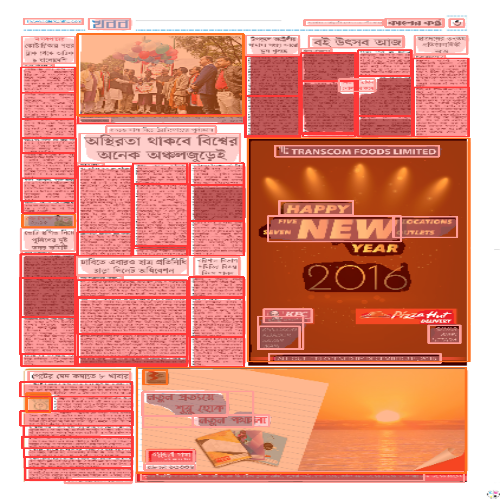

In [ ]:
image_path = '/content/drive/MyDrive/reconstruction/img_to_be_reconstructed/ekal1.jpg'
config_yml = ''
model_weight ='/content/drive/MyDrive/reconstruction/best.pt'


result = single_image_layout(model_weight,image_path,config_yml)

# HTML Mapping

In [ ]:
from bs4 import BeautifulSoup
from bs4.formatter import HTMLFormatter

class HtmlGenerator:
    def __init__(self, filename="default"):
        with open("/content/drive/MyDrive/reconstruction/templates/index.html", 'r') as f:
            index_template = f.read()

        self.index_template = BeautifulSoup(index_template, "html.parser")
        self.index_template_root_div = self.index_template.find("div", {"id": "root"})
        self.filename = filename

    def read_html_template(self, template_name):
        with open(f"/content/drive/MyDrive/reconstruction/templates/{template_name}.html", 'r') as f:
            template = f.read()
            soup_template = BeautifulSoup(template, "html.parser")
            return soup_template


    def get_styles(self, dict):
        styles = f'top: {dict["top"]}vh; left: {dict["left"]}vw; height: {dict["elem_height"]}vh; width: {dict["elem_width"]}vw;'
        return styles


    def insert_paragraph(self, paragraph_info):
        paragraph_template = self.read_html_template("paragraph")

        p_tag = paragraph_template.find('p')
        text = paragraph_template.new_string(paragraph_info['text'])
        p_tag.append(text)

        paragraph_div = paragraph_template.find("div")
        paragraph_div["style"] = self.get_styles(paragraph_info)

        self.index_template_root_div.append(paragraph_template)


    def insert_text_box(self, text_box_info):
      text_box_template = self.read_html_template("text_box")

      p_tag = text_box_template.find('p')
      text = text_box_template.new_string(text_box_info['text'])
      p_tag.append(text)

      text_box_div = text_box_template.find("div")
      text_box_div["style"] =self.get_styles(text_box_info)

      self.index_template_root_div.append(text_box_template)


    def insert_image(self, img_info):

        image_template = self.read_html_template("image")

        img_div = image_template.find("div")
        img_div["style"] = self.get_styles(img_info)

        img_tag = image_template.new_tag('img')
        img_tag['src'] = img_info['img_src']

        img_style = "width: 100%; height: 100%; object-fit: fill;"
        img_tag['style'] = img_style

        img_div.append(img_tag)

        self.index_template_root_div.append(image_template)


    def create_html_file(self):
        with open(f"/content/drive/MyDrive/reconstruction/html_output/{self.filename}.html", "w") as f:
            f.write(str(self.index_template.prettify(formatter=HTMLFormatter(indent=2))))

In [ ]:
def generate_html(detected_elements_info, file_name):
    file_name, extension = file_name.split(".")

    gen = HtmlGenerator(file_name)

    for element_info in detected_elements_info:

        if element_info['class'] == 'paragraph':
            gen.insert_paragraph(element_info)

        elif element_info['class'] == 'text_box':
            gen.insert_text_box(element_info)

        elif element_info['class'] == 'image':
            gen.insert_image(element_info)

    gen.create_html_file()

In [ ]:
import math
from shapely.geometry import box
import time

config_yml = ''
model_weight ='/content/drive/MyDrive/reconstruction/best.pt'

# image_path = '/content/drive/MyDrive/reconstruction/test_images/000be499-dd8a-49b1-8cd9-a9a792e8fb38.png'
# file_name = image_path.split('/')[-1].strip('.jpg')
# print(file_name)

def get_normalized_coordinates(xyxy_tensor, height, width):
    x_min = xyxy_tensor[0][0].item() / width
    y_min = xyxy_tensor[0][1].item() / height
    x_max = xyxy_tensor[0][2].item() / width
    y_max = xyxy_tensor[0][3].item() / height

    coordinates = [x_min, y_min, x_max, y_max]
    return coordinates


def get_original_coordinates(normalized_coordinates, image_width, image_height):
    orig_coordinates = [None]*4

    orig_coordinates[0] = math.floor(normalized_coordinates[0] * image_width)
    orig_coordinates[1] = math.floor(normalized_coordinates[1] * image_height)
    orig_coordinates[2] = math.ceil(normalized_coordinates[2] * image_width)
    orig_coordinates[3] = math.ceil(normalized_coordinates[3] * image_height)

    return orig_coordinates


def get_coordinates_from_segmentation(result_word):
    words_xyxy = []

    for i in range(len(result_word[0])):
        [[x_min, y_min], [x_max, y_min], [x_max, y_max], [x_min, y_max]] = result_word[0][i]
        words_xyxy.append([math.floor(x_min), math.floor(y_min), math.ceil(x_max), math.ceil(y_max)])

    return words_xyxy


def line_vertical_dilation(line_coordinates):

    for i in range(len(line_coordinates)):

        if i+1 < len(line_coordinates):
            [x_min, y_min, x_max, y_max] = line_coordinates[i]
            [x_min1, y_min1, x_max1, y_max1] = line_coordinates[i+1]

            bottom_gap = y_min1 - y_max
            if bottom_gap > 0:
                y_max += bottom_gap // 2
                y_min1 -= bottom_gap //2

                line_coordinates[i][3] = y_max
                line_coordinates[i+1][1] = y_min1

    return line_coordinates



def top_bottom_padding(cropped_text_region):
    h, w = cropped_text_region.shape[:2]
    padded_height = int(h * 1.5)
    padded_width = w

    padded_image = np.ones((padded_height, padded_width, 3), dtype=np.uint8) * 255

    top_padding = (h*2 - h) // 2
    bottom_padding = top_padding + h

    padded_image[top_padding:bottom_padding, :] = cropped_text_region

    return padded_image



names = {0: 'paragraph', 1: 'text_box', 2: 'image', 3: 'table'}

def run_yolo_model(model_weight, image_path, file_name, img_src_save_directory):

    file_name, extension = file_name.split('.')

    model = YOLO(model_weight)

    image = cv2.imread(image_path)

    # upscaling 2x
    # height, width = image.shape[:2]
    # image = cv2.resize(image, (2*width, 2*height))

    # plt.imshow(image)
    color_map = {
        'text_box':   'red',
        'paragraph':  'blue',
        'image':   'green',
        'table':  'yellow',
    }

    # layout_predicted = model(image)
    res = model(image)[0]

    region_of_interests = []

    for i in range(len(res.boxes)):
        info_dict = {"class": None,
                    "coordinates": None,
                    "left": None,
                    "top": None,
                    "elem_height": None,
                    "elem_width": None,
                    "img_height": None,
                    "img_width": None,
                    "text": None,
                    "single-line": False,
                    "img_src": None
                    }

        cls = res.boxes[i].cls.item()

        img_height, img_width = res.boxes[i].orig_shape

        normalized_coordinates = get_normalized_coordinates(res.boxes[i].xyxy, img_height, img_width)

        if cls == 0:
            info_dict['class'] = names[0]
        elif cls == 1:
            info_dict['class'] = names[1]
        elif cls == 2:
            info_dict['class'] = names[2]
        elif cls == 3:
            info_dict['class'] = names[3]

        info_dict['coordinates'] = normalized_coordinates
        info_dict['left'], info_dict['top'] = normalized_coordinates[0]*100, normalized_coordinates[1]*100
        info_dict['img_height'], info_dict['img_width'] = img_height, img_width
        info_dict['elem_width'] = (normalized_coordinates[2] - normalized_coordinates[0]) * 100
        info_dict['elem_height'] = (normalized_coordinates[3] - normalized_coordinates[1]) * 100


        if info_dict['class']=="paragraph" or info_dict['class']=="text_box":
            x_min, y_min, x_max, y_max = get_original_coordinates(normalized_coordinates, info_dict["img_width"], info_dict["img_height"])


            cropped_text_region = image[y_min:y_max, x_min:x_max]

            cropped_text_region = top_bottom_padding(cropped_text_region)

            # resized_image = cv2.resize(cropped_text_region, (400, 400))
            # print(y_min,y_max, x_min,x_max)
            # cv2_imshow(cropped_text_region)
            # print("cropped_text_region", cropped_text_region)

            result_line = line_segmentation(cropped_text_region)
            # print("result_line", result_line)

            line_coordinates = get_coordinates_from_segmentation(result_line)
            # print("line_coordinates", line_coordinates)

            # sort line coordinates based on y_min
            sorted_line_coordinates = sorted(line_coordinates, key = lambda x: x[1])
            # print("sorted_line_coordinates before dilation", sorted_line_coordinates)

            # sorted_line_coordinates = line_vertical_dilation(sorted_line_coordinates)
            # print("sorted_line_coordinates after dilation", sorted_line_coordinates)


            text = []
            # font_size = 0

            for i in range(len(sorted_line_coordinates)):

                cropped_line_region = cropped_text_region[sorted_line_coordinates[i][1]:sorted_line_coordinates[i][3],
                                                          sorted_line_coordinates[i][0]:sorted_line_coordinates[i][2]]

                if len(sorted_line_coordinates) == 1:
                  info_dict['single-line'] = True
                  info_dict['elem_height'] *= 1.4

                # if len(cropped_line_region) != 0:
                #   cv2_imshow(cropped_line_region)
                #   print("#############")

                # print("cropped_line_region", cropped_line_region)

                if len(cropped_line_region) != 0:
                    result_word = word_segmentation(cropped_line_region)
                    # print("result_word", result_word)

                    # word_coordinates = get_coordinates_from_segmentation(result_word)
                    # print("word_coordinates", word_coordinates)

                    # sort line coordinates based on x_min
                    sorted_result_word = sorted(result_word[0], key = lambda x: x[0][0])
                    # print("sorted_result_word", sorted_result_word)

                    if len(sorted_result_word) != 0:
                        words, crops, boxes = recognize_word(cropped_line_region, [sorted_result_word])
                        print(crops)
                        # for i, crop in enumerate(crops):
                        #     [[x_min, y_min], [x_max, y_min], [x_max, y_max], [x_min, y_max]] = boxes[i]
                        #     x_min-= 4
                        #     x_max += 5
                        #     print(y_min, y_max, x_min, x_max)
                        #     cv2_imshow(cropped_line_region[int(y_min):int(y_max), int(x_min):int(x_max)])
                        #     print("--------------------------")
                        # print("words", words)
                        text += words

            # info_dict['font-size'] = font_size
            text = ' '.join(text)
            info_dict['text'] = text
            # print(text)

        elif info_dict['class']=="image":
            x_min, y_min, x_max, y_max = get_original_coordinates(normalized_coordinates, info_dict["img_width"], info_dict["img_height"])
            cropped_image_region = image[y_min:y_max, x_min:x_max]
            src = f'{img_src_save_directory}\\{file_name}_{i}.{extension}'
            info_dict['img_src'] = src
            cv2.imwrite(f'/content/drive/MyDrive/reconstruction/img_src/{file_name}_{i}.{extension}', cropped_image_region)


        region_of_interests.append(info_dict)

    # handling overlapping text regions
    discard_elements = []
    for i, element in enumerate(region_of_interests):
        bb1 = box(element['coordinates'][0], element['coordinates'][1], element['coordinates'][2], element['coordinates'][3])

        for j, other_element in enumerate(region_of_interests):
            if j > i:
                bb2 = box(other_element['coordinates'][0], other_element['coordinates'][1], other_element['coordinates'][2], other_element['coordinates'][3])
                intersection = bb1.intersection(bb2).area
                if bb1.area < bb2.area:
                    iou = intersection / bb1.area
                    if iou > 0.5:
                        if i not in discard_elements: discard_elements.append(i)
                else:
                    iou = intersection / bb2.area
                    if iou > 0.5:
                        if j not in discard_elements: discard_elements.append(j)
                # print(i, iou)
                # if iou > 0.5:
                #     if j not in discard_elements: discard_elements.append(j)

    # print("discard", discard_elements)

    items_deleted = 0
    for index in discard_elements:
        del region_of_interests[index - items_deleted]
        items_deleted += 1

    # print(region_of_interests)
    return region_of_interests

Generate html file

In [ ]:
import os
import time

def reconstruct(directory, img_src_save_dir):
    directory = '/content/drive/MyDrive/reconstruction/img_to_be_reconstructed'  # Replace with your test directory path
    img_src_save_dir = 'D:\\BADLAD\\html_output\\Final Output\\img' # Replace with your image source directory path

    # Iterate over all files in the directory
    for file_name in os.listdir(directory):
        if os.path.isfile(os.path.join(directory, file_name)):

            file_path = directory + "/" + file_name

            print("----------------------------------------------------------------------------")
            print("File name:", file_name)

            start_time = time.time()
            roi = run_yolo_model(model_weight, file_path, file_name, img_src_save_dir)
            print("Execution Time for Layout Prediction and Text Recognition:", round(time.time() - start_time, 2), "seconds")

            start_time = time.time()
            generate_html(roi, file_name)
            print("Execution Time for Reconstruction:", round(time.time() - start_time, 2), "seconds")
            print("----------------------------------------------------------------------------")

In [ ]:
test_image_directory = '/content/drive/MyDrive/reconstruction/img_to_be_reconstructed'
img_src_save_dir = 'D:\\BADLAD\\html_output\\Final Output\\img'
reconstruct(test_image_directory, img_src_save_dir)

----------------------------------------------------------------------------
File name: dc (2).png



0: 640x448 12 paragraphs, 3 text_boxs, 73.0ms
Speed: 3.2ms preprocess, 73.0ms inference, 11.2ms postprocess per image at shape (1, 3, 640, 448)


Streaming output truncated to the last 5000 lines.
        ...,
        [ 66,  66,  66],
        [254, 254, 254],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [194, 194, 194],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8), array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [201, 201, 201],
        [214, 214, 214],
        [242, 242, 242]],

       [[196, 196, 196],
        [132, 132, 132],
        [132, 132, 132],
        ...,
        [ 66,  66,  66],
        [ 82,  82,  82],
        [180, 180, 180]],

       [[165, 165, 165],
        [ 21,  21,  21],
        [  0,   0,   0],
        ...,
        [ 14,  14,  14],
        [ 81,  81,  81],
        [196, 196, 196]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 54,  54,  54],
        [189, 189, 189],
        [255, 255, 255]],

       


0: 640x448 49 paragraphs, 42 text_boxs, 7 images, 17.0ms
Speed: 2.5ms preprocess, 17.0ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 448)


Streaming output truncated to the last 5000 lines.
        [247, 246, 248],
        [ 98,  98,  98],
        [185, 185, 185],
        [252, 252, 252]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [153, 153, 153],
        [200, 200, 200],
        [252, 252, 252],
        [255, 255, 255],
        [253, 253, 253],
        [255, 255, 255],
        [249, 249, 249],
        [204, 204, 204],
        [ 32,  32,  32],
        [ 37,  37,  37],
        [206, 206, 206],
        [255, 255, 255],
        [131, 131, 131],
        [238, 238, 238],
        [251, 251, 251],
        [252, 252, 252],
        [121, 121, 121],
        [178, 178, 178],
        [249, 249, 249]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [251, 251, 251],
        [246, 246, 246],
        [255, 255, 2

In [ ]:
 # from google.colab import files

# # Provide the file path that you want to download
# file_path = '/content/drive/MyDrive/reconstruction/test_images/000a84c1-12f1-4977-acaf-071b42281d93.png'  # Replace with your file path

# # Download the file
# files.download(file_path)